## Observations and Insights

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
# Combine the data into a single dataset
merge_df = mouse_metadata.merge(study_results, on = "Mouse ID")

merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_Regimen_List = merge_df["Drug Regimen"].unique().tolist()

TotalList = []
individualList = []

for drugRegimen in Drug_Regimen_List:
    Drug_Regiment_df = merge_df.loc[merge_df["Drug Regimen"] == drugRegimen]
    TumorVolume = Drug_Regiment_df["Tumor Volume (mm3)"]
    individualList.append(drugRegimen)
    individualList.append(np.mean(TumorVolume))
    individualList.append(np.median(TumorVolume))
    individualList.append(np.var(TumorVolume))
    individualList.append(np.std(TumorVolume))
    individualList.append(st.sem(TumorVolume))
    TotalList.append(individualList)
    individualList = []

Columns = ['Drug Regimen', 'mean','median', 'variance', 'standard deviation', 'SEM']
Summary_table_df = pd.DataFrame(data=TotalList, columns=Columns)    
Summary_table_df
    

    

,Drug Regimen,mean,median,variance,standard deviation,SEM
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
5,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
6,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
7,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
8,Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


## Bar plots

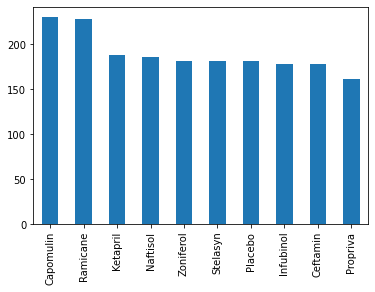

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drug_Regimen = merge_df["Drug Regimen"].value_counts()
Drug_Regimen.plot.bar()

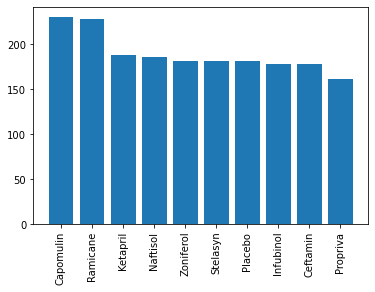

In [7]:
Drug_Regimen_df_plt = merge_df["Drug Regimen"].value_counts().rename_axis('Drug Regimen').reset_index(name='counts')
plt.bar(Drug_Regimen_df_plt["Drug Regimen"], Drug_Regimen_df_plt["counts"], width=0.8)
plt.xticks(range(len(Drug_Regimen_df_plt["Drug Regimen"])),Drug_Regimen_df_plt["Drug Regimen"], rotation=90)
plt.show()

## Pie plots

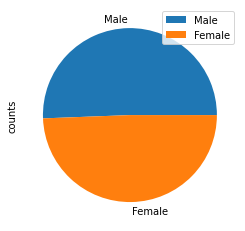

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_df = merge_df["Sex"].value_counts().rename_axis('Sex').to_frame('counts')
Gender_df.plot.pie(y = "counts")

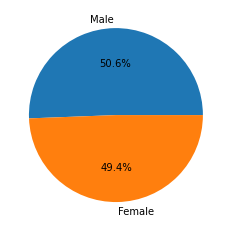

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_df = merge_df["Sex"].value_counts().rename_axis('Sex').reset_index(name ='counts')
fig1, ax1 = plt.subplots()
ax1.pie(Gender_df["counts"], labels= Gender_df["Sex"], autopct='%1.1f%%')
plt.show()


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

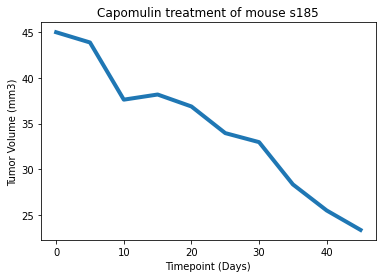

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_s185 = merge_df.loc[merge_df["Mouse ID"] == "s185"]
TimePoint_s185 = Capomulin_mouse["Timepoint"].to_list()
Tumor_Volume_s185 = Capomulin_mouse["Tumor Volume (mm3)"].to_list()

plt.title("Capomulin treatment of mouse s185")
plt.plot(TimePoint_s185, Tumor_Volume_s185, linewidth=4)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

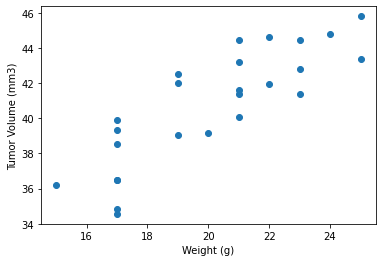

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_average =  ((merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]).groupby(["Mouse ID"])).mean()
plt.scatter(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = st.pearsonr(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"])[0]
print("The correlation coefficient is " + str(correlation_coefficient))

The correlation coefficient is 0.8419363424694716


In [29]:
Lin_List = st.linregress(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"])

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712645e-07, stderr=0.1275435903320134)

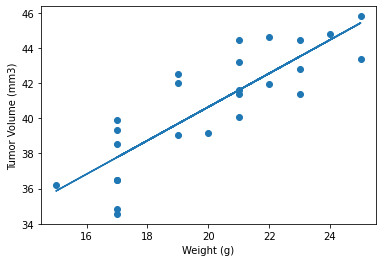

In [31]:
plt.scatter(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"])
y_value = Capomulin_average["Weight (g)"] * Lin_List[0] + Lin_List[1]
plt.plot(Capomulin_average["Weight (g)"], y_value)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()